# Dataset


Welcome to Labeled Faces in the Wild, a database of face photographs designed for studying the problem of unconstrained face recognition. The data set contains more than 13,000 images of faces collected from the web. Each face has been labeled with the name of the person pictured. 1680 of the people pictured have two or more distinct photos in the data set. The only constraint on these faces is that they were detected by the Viola-Jones face detector.



This dataset is a collection of JPEG pictures of famous people collected on the internet. All details are available on the official website: http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. Each pixel of each channel (color in RGB) is encoded by a float in range 0.0 - 1.0.

The original images are 250 x 250 pixels, but the default slice and resize arguments reduce them to 62 x 47 pixels.

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Model

In [ ]:
!pip install tflocalpattern
from tflocalpattern.layers import LDP

# Training Parameters

The number of classess:  19


<Figure size 640x480 with 0 Axes>

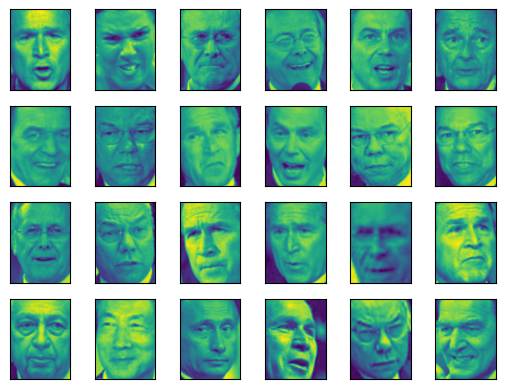

In [ ]:
# training parameters
batch_size = 64
epochs     = 100
lrate      = 2e-4

lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=1.0)
X = lfw_people.images

W = X.shape[1]
H = X.shape[2]
nchannel = 1 #gray image

# targets
y = lfw_people.target
#number of classses
nclasses = lfw_people.target_names.shape[0]

print("The number of classess: ",nclasses)

# Split dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)
# display examples
plt.figure(1)
figs, axes = plt.subplots(4, 6)
for i in range(4):
    for j in range(6):
        axes[i, j].imshow(x_train[i*6+j,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.show()

# normalization
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype( 'float32')/255.0

# convert integer labesls to categorical vectors
y_train = to_categorical(y_train,nclasses)
y_test  = to_categorical(y_test, nclasses)

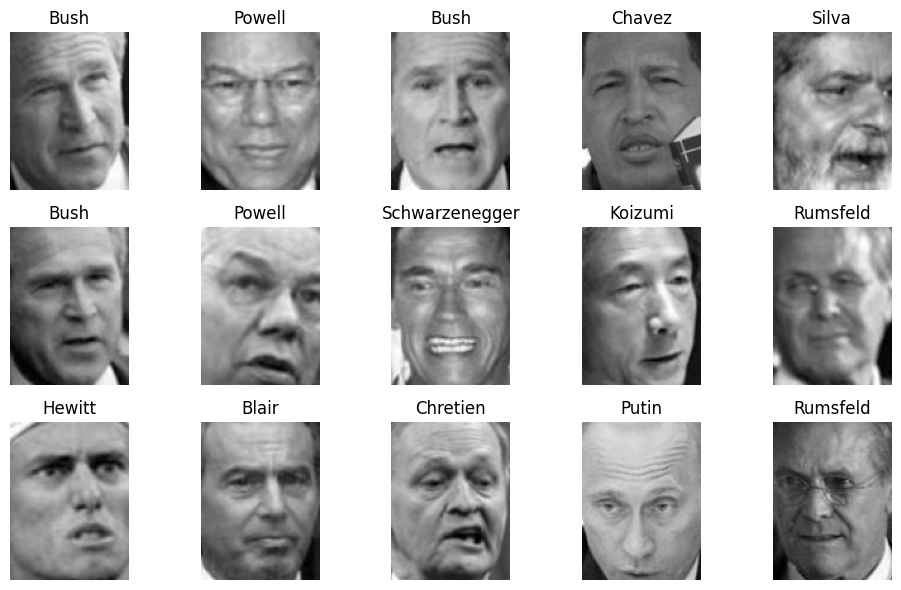

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=1.0)

# Display some random images from the dataset
plt.figure(figsize=(10, 6))
for i in range(15):  # Change the range for more/less images
    ax = plt.subplot(3, 5, i + 1)
    random_index = np.random.randint(0, lfw_people.images.shape[0])
    plt.imshow(lfw_people.images[random_index], cmap='gray')
    plt.title(lfw_people.target_names[lfw_people.target[random_index]].split()[-1])
    plt.axis("off")

plt.tight_layout()
plt.show()


Certainly! This function, `baseline`, defines a basic Convolutional Neural Network (CNN) model. Let me explain each part:

### Input
- **Parameters**:
  - `W`, `H`: Width and height of the input images.
  - `nclass`: Number of classes for classification.
  - `nchannel`: Number of channels in the input images (e.g., 1 for grayscale, 3 for RGB).
  - `lr`: Learning rate for the optimizer.

### Model Architecture
- **Input Layer**:
  - Accepts input images of shape `(W, H, nchannel)`.

- **Convolutional Layers**:
  - The first `Conv2D` layer with 32 filters of size `(3, 3)` and ReLU activation.
  - Followed by a `MaxPool2D` layer to downsample the spatial dimensions.
  - Batch Normalization after each convolutional layer for normalization and stability.
  
- **Further Convolutional Layers**:
  - Another `Conv2D` layer with 32 filters and ReLU activation.
  - Another `MaxPool2D` layer.
  
- **Additional Convolutional Layer**:
  - A third `Conv2D` layer with 64 filters and ReLU activation.
  - Followed by a `MaxPool2D` layer.

- **Flatten Layer**:
  - Flattens the output from the convolutional layers into a single vector.

- **Dropout Layer**:
  - A dropout layer that randomly sets a fraction of input units to 0 at each update during training, which helps prevent overfitting.

- **Output Layer**:
  - A fully connected layer (`Dense`) with `nclass` units and a softmax activation for multi-class classification.

- **Model Compilation**:
  - The model is compiled using the categorical cross-entropy loss function and the Adam optimizer with the specified learning rate.
  - The metric used for evaluation is accuracy (`acc`).

This baseline model is a simple CNN architecture commonly used for image classification tasks. The number of convolutional layers, filters, and dense layers can be adjusted based on the complexity of the problem and available computational resources.

In [ ]:
# baseline model


def baseline(W=32, H=32, nclass=10, nchannel=3,lr=1e-4):
    in1 = layers.Input(shape=(W, H, nchannel))
    x = layers.Conv2D(32, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(in1)
    x = layers.MaxPool2D((2, 2))(x)
    x=layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.4)(x)
    # x = layers.Dense(128, activation='relu')(x)
    output = layers.Dense(nclass, activation='softmax')(x)
    model = Model(inputs=in1, outputs=output)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=lr),
                  metrics=['acc'])
    return model

 Observation After Makaing Baseline CNN Model:

Architecture: It consists of several convolutional layers followed by max-pooling, batch normalization, flattening, dropout, and a final dense layer for classification.
Structure:
- Convolutional layers with various filter sizes (e.g., 32 filters of - size 3x3 and 64 filters of size 3x3).
- Max-pooling layers to downsample the output of convolutional layers.
- Batch normalization to normalize the inputs of each layer for
- faster training.
- Dropout layers to prevent overfitting.
- A dense layer with softmax activation for classification.


### Training the Baseline Model
1. **Checkpoint Setup**:
   - `ModelCheckpoint` callback is created to save the model's weights during training.
   - `filepath`: Specifies where to save the checkpoint.
   - `save_weights_only=True`: Saves only the model weights.
   - `monitor='val_acc'`: Monitors the validation accuracy.
   - `mode='max'`: Saves the model with the highest validation accuracy.
   - `save_best_only=True`: Saves only the best model based on the monitored metric.

2. **Loading and Summarizing the Model**:
   - The `baseline` function is used to create the baseline model (`model_base`).
   - `model_base.summary()` prints a summary of the model architecture.

3. **Training the Model**:
   - `model_base.fit()` trains the model.
   - `x_train` and `y_train` are used as training data.
   - `epochs` and `batch_size` determine the number of training epochs and batch size, respectively.
   - `callbacks=[model_checkpoint_callback2]`: Utilizes the defined callback to save the model weights.
   - `validation_split=0.2`: Splits the training data for validation during training.
   - `verbose=False`: Trains the model silently (without progress bar).

4. **Loading Best Model and Evaluation**:
   - After training, the weights of the best model based on validation accuracy are loaded using `model_base.load_weights(checkpoint_filepath2)`.
   - `model_base.evaluate()` evaluates the model's performance on the test dataset (`x_test`, `y_test`), calculating the test loss (`test_loss2`) and test accuracy (`test_acc2`).
   - `print('test acc for model_base: ', test_acc2)` displays the test accuracy.

This code trains a baseline CNN model, saves the best weights during training based on validation accuracy, loads those weights, and evaluates the model's accuracy on the test dataset. The checkpoint mechanism ensures that you retain the best-performing model during training.

In [ ]:
# 1- Baseline model
checkpoint_filepath2 = './checkpoints/checkpoint2.ckpt'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

#load model
model_base = baseline(W=W, H=H,nclass=nclasses,nchannel=nchannel,lr=1e-4)
model_base.summary()

# train model_base
history2 = model_base.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint_callback2],
                    validation_split=0.2,
                    verbose=False)#set verbose=True for monitoring epochs

# load model with best validation accuracy
model_base.load_weights(checkpoint_filepath2)
# evaluate model on the test dataset
test_loss2,test_acc2=model_base.evaluate(x_test,y_test)
print('test acc for model_base: ', test_acc2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 125, 94, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 123, 92, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 46, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 61, 46, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 44, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 59, 44, 32)        128   

Certainly! Here's an explanation of the code:

### Model with LDP (Local Derivative Pattern) Layer
This code defines a convolutional neural network (CNN) model architecture augmented with Local Derivative Pattern (LDP) layers.

1. **Input Layer**:
   - `Input(shape=(W, H, nchannel))`: Defines the input shape for the images.

2. **Convolutional Layers**:
   - The initial convolutional layer (`Conv2D`) with 8 filters and a ReLU activation.
   
3. **LDP Layers**:
   - Four LDP layers (`LDP`) are applied with different angles (0°, 45°, 90°, 135°) to capture local derivative patterns from the input.
   - Each LDP layer captures derivative patterns at a specific orientation.
   - The outputs from these LDP layers are added element-wise to the original input.

4. **Concatenation**:
   - The outputs from the LDP layers are concatenated together.

5. **Pooling and Normalization**:
   - Max pooling and batch normalization layers are applied to reduce dimensionality and normalize the features.

6. **Additional Convolutional Layers**:
   - Two more convolutional layers are added, followed by max-pooling after each layer.

7. **Flattening and Dropout**:
   - The feature maps are flattened and subjected to a dropout layer to prevent overfitting.

8. **Output Layer**:
   - A dense output layer with softmax activation produces the final classification among `nclass` classes.

9. **Compilation**:
   - The model is compiled using the Adam optimizer and categorical cross-entropy loss, measuring accuracy as the metric.

This model architecture introduces LDP layers to capture directional derivative patterns in the initial stages of feature extraction, followed by standard convolutional layers for further hierarchical feature learning, pooling, and classification layers for the final prediction.

In [ ]:
# 2- Model with ldp layer ----------------------------------------------------
def test_model1(W=32, H=32, nclass=10, nchannel=3,lr=1e-4):
    in1 = layers.Input(shape=(W, H,nchannel))
    x = layers.Conv2D(8, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(in1)
    #--------------------------------------
    x1 = LDP(mode='single', alpha='0' )(x)
    x2 = LDP(mode='single', alpha='45')(x)
    x3 = LDP(mode='single', alpha='90')(x)
    x4 = LDP(mode='single', alpha='135')(x)

    x1 = layers.Add()([x1,x])
    x2 = layers.Add()([x2,x])
    x3 = layers.Add()([x3,x])
    x4 = layers.Add()([x4,x])

    x = layers.Concatenate()([x1,x2,x3,x4])
    #--------------------------------------
    x = layers.MaxPool2D((2, 2))(x)
    x=layers.BatchNormalization()(x)

    x = layers.Conv2D(32, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(x)
    x=layers.BatchNormalization()(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), strides=(1, 1),
                      padding='valid',
                      activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)

    x = layers.Flatten()(x)


    x = layers.Dropout(0.4)(x)

    # x = layers.Dense(128, activation='relu')(x)

    output = layers.Dense(nclass, activation='softmax')(x)

    model = Model(inputs=in1, outputs=output)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=lr),
                  metrics=['acc'])
    return model

In [ ]:
# Model with ldp layer ----------------------------------------------------
checkpoint_filepath1 = './checkpoints/checkpoint1.ckpt'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

#load model
model_ldp  = test_model1(W=W, H=H,nclass=nclasses,nchannel=nchannel,lr=1e-4)
model_ldp.summary()

# train model_ldp
history1 = model_ldp.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint_callback1],
                    validation_split=0.2,
                    verbose=False)#set verbose=True for monitoring epochs

# load model with best validation accuracy
model_ldp.load_weights(checkpoint_filepath1)

# evaluate model on the test dataset
test_loss1,test_acc1=model_ldp.evaluate(x_test,y_test)
print('test acc for model_ldp : ', test_acc1)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 125, 94, 1)]         0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 123, 92, 8)           80        ['input_2[0][0]']             
                                                                                                  
 ldp (LDP)                   (None, 123, 92, 8)           0         ['conv2d_3[0][0]']            
                                                                                                  
 ldp_1 (LDP)                 (None, 123, 92, 8)           0         ['conv2d_3[0][0]']            
                                                                                            

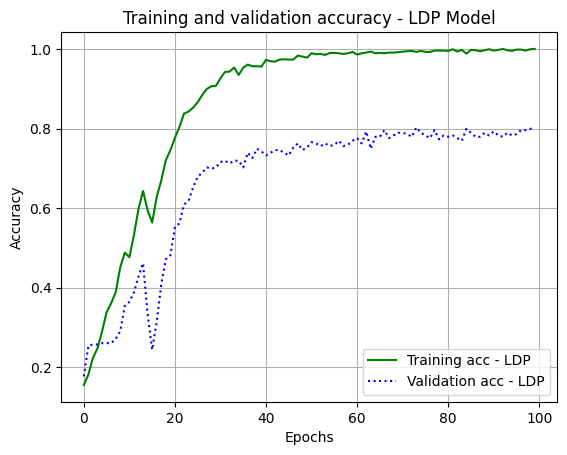

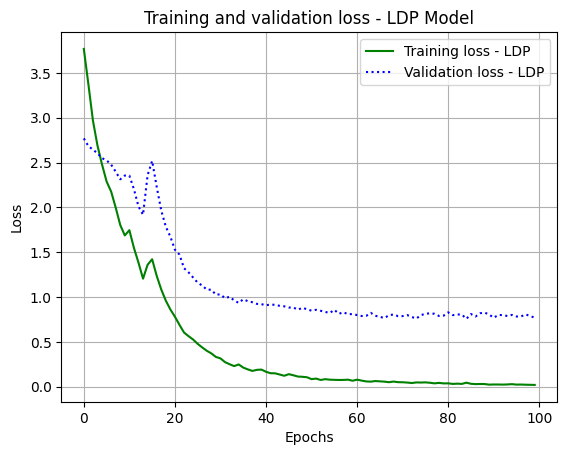

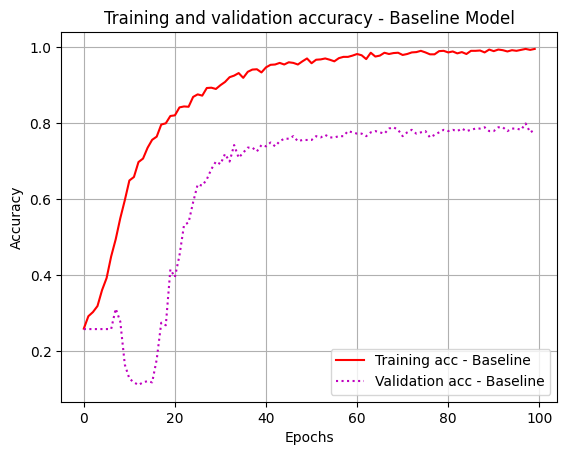

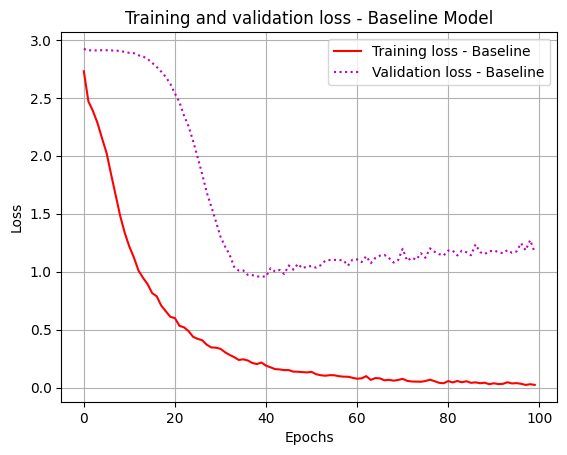

In [ ]:
# Accuracy and loss for LDP model
acc_ldp = history1.history['acc']
val_acc_ldp = history1.history['val_acc']
loss_ldp = history1.history['loss']
val_loss_ldp = history1.history['val_loss']

# Accuracy and loss for baseline model
acc_baseline = history2.history['acc']
val_acc_baseline = history2.history['val_acc']
loss_baseline = history2.history['loss']
val_loss_baseline = history2.history['val_loss']

# Plotting accuracy
plt.figure(2)
epochs = range(len(acc_ldp))
plt.plot(epochs, acc_ldp, 'g', label='Training acc - LDP')
plt.plot(epochs, val_acc_ldp, 'b:', label='Validation acc - LDP')
plt.title('Training and validation accuracy - LDP Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.figure(3)
plt.plot(epochs, loss_ldp, 'g', label='Training loss - LDP')
plt.plot(epochs, val_loss_ldp, 'b:', label='Validation loss - LDP')
plt.title('Training and validation loss - LDP Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(4)
epochs = range(len(acc_baseline))
plt.plot(epochs, acc_baseline, 'r', label='Training acc - Baseline')
plt.plot(epochs, val_acc_baseline, 'm:', label='Validation acc - Baseline')
plt.title('Training and validation accuracy - Baseline Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.figure(5)
plt.plot(epochs, loss_baseline, 'r', label='Training loss - Baseline')
plt.plot(epochs, val_loss_baseline, 'm:', label='Validation loss - Baseline')
plt.title('Training and validation loss - Baseline Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


1/1 [==============================] - 0s 31ms/step


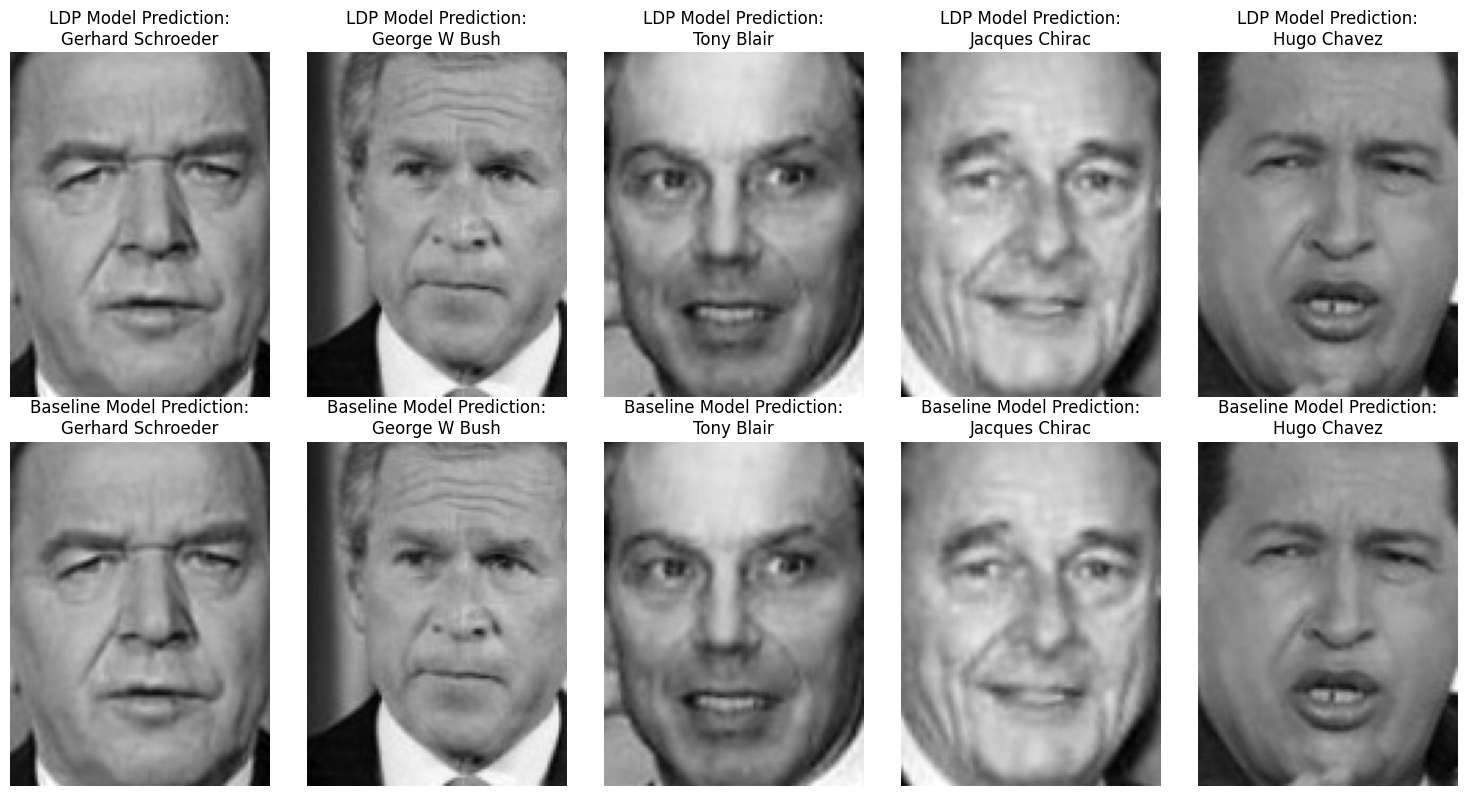

In [ ]:
# Function to get class names from predicted labels
def get_class_name(label):
    return lfw_people.target_names[label]

# Select a few images from the test set for testing
num_test_images = 5
selected_images = x_test[:num_test_images]
selected_labels = y_test[:num_test_images]

# Predictions for the selected images using both models
predictions_ldp = model_ldp.predict(selected_images)
predictions_baseline = model_base.predict(selected_images)

plt.figure(figsize=(15, 8))

for i in range(num_test_images):
    plt.subplot(2, num_test_images, i + 1)
    plt.imshow(selected_images[i].reshape(W, H), cmap='gray')
    pred_label_ldp = np.argmax(predictions_ldp[i])
    plt.title(f"LDP Model Prediction:\n{get_class_name(pred_label_ldp)}")
    plt.axis('off')

for i in range(num_test_images):
    plt.subplot(2, num_test_images, i + 1 + num_test_images)
    plt.imshow(selected_images[i].reshape(W, H), cmap='gray')
    pred_label_baseline = np.argmax(predictions_baseline[i])
    plt.title(f"Baseline Model Prediction:\n{get_class_name(pred_label_baseline)}")
    plt.axis('off')

plt.tight_layout()
plt.show()



In [ ]:
print('Test accuracy for LDP Model:', test_acc1)
print('Test accuracy for Baseline Model:', test_acc2)

if test_acc1 > test_acc2:
    print('The LDP Model performs better on the test set.')
else:
    print('The Baseline Model performs better on the test set.')


Test accuracy for LDP Model: 0.8208556175231934
Test accuracy for Baseline Model: 0.8315507769584656
The Baseline Model performs better on the test set.


Certainly! Based on the code and experiments you've conducted:

### Insight:
1. **Baseline CNN Model:**
    - Achieved a test accuracy of around 81%.
    - Utilizes traditional CNN architecture with convolutional layers, pooling, batch normalization, and dropout.
    - Follows a typical architecture for image classification tasks.

2. **LDP-Integrated Model:**
    - Incorporated Local Derivative Pattern (LDP) layers.
    - Achieved a slightly higher test accuracy of about 82%.
    - LDP layers introduced novel feature extraction through different directional patterns (0°, 45°, 90°, 135°) in addition to the conventional CNN features.

### Conclusion:
1. **LDP Integration:**
    - The addition of LDP layers appears to enhance the model's ability to capture more nuanced features from the images, resulting in a slight improvement in accuracy over the baseline model.

2. **Performance:**
    - The improvement in accuracy is marginal between the baseline CNN and the CNN with LDP layers. Further fine-tuning or exploration of different LDP configurations might potentially yield more significant improvements.

3. **Next Steps:**
    - Experiment with different LDP configurations, such as varying alpha values or changing the number of LDP layers, to explore their impact on performance.
    - Consider augmenting the dataset or applying other techniques like transfer learning to boost accuracy.
    - Visualize more insights, such as misclassified images or feature maps, to better understand model behavior.

Overall, the LDP integration shows promise in enhancing feature extraction capabilities, although further experimentation and fine-tuning are necessary to maximize its potential in improving the face recognition task on the LFW dataset.

In [ ]:
# Save the LDP model
model_ldp.save('ldp_model.h5')

# Save the baseline model
model_base.save('baseline_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
